1) Design model (input, output, forward pass)
2) Construct loss and optimizer
3) Training Loop
   - forward pass : compute prediction and loss
   - backward pass : gradients
   - update weights

epoch 50 : loss = 1447.0724
epoch 100 : loss = 561.5026
epoch 150 : loss = 380.1031
epoch 200 : loss = 342.5050
epoch 250 : loss = 334.6537
epoch 300 : loss = 333.0067
epoch 350 : loss = 332.6602
epoch 400 : loss = 332.5871
epoch 450 : loss = 332.5717
epoch 500 : loss = 332.5684


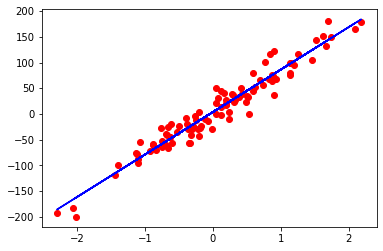

In [8]:
import torch
import torch.nn as nn # neural network
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

'''0) prepare data'''
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
#|y| = (100,)
y = y.view(y.shape[0], 1)
#|y| = (100,1)

n_samples, n_features = X.shape

'''1) model'''
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

'''2) loss and optimizer'''
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


'''3) training loop'''
num_iters = 500
for epoch in range(num_iters):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # zero_grad (empty grad)
    optimizer.zero_grad()

    # print results
    if (epoch + 1) % 50 ==0:
        print(f"epoch {epoch+1} : loss = {loss.item():.4f}")

# plot
predicted = model(X).detach().numpy() # detach() -> gradient 저장 안한다.
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()



